         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
9563  16.65  49.69  1014.01  91.00  460.03
9564  13.19  39.18  1023.67  66.78  469.62
9565  31.32  74.33  1012.92  36.48  429.57
9566  24.48  69.45  1013.86  62.39  435.74
9567  21.60  62.52  1017.23  67.87  453.28

[9568 rows x 5 columns]
         AT      V       AP     RH      PE
0     14.96  41.76  1024.07  73.17  463.26
1     25.18  62.96  1020.04  59.08  444.37
2      5.11  39.40  1012.16  92.14  488.56
3     20.86  57.32  1010.24  76.64  446.48
4     10.82  37.50  1009.23  96.62  473.90
...     ...    ...      ...    ...     ...
6693  16.76  43.77  1012.25  77.95  457.00
6694  18.21  49.69  1013.54  80.16  454.25
6695   7.85  37.80  1020.90  59.19  478.68
6696  17.81  37.20  1011.98  

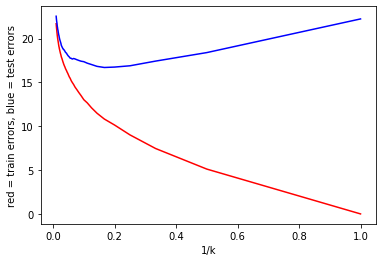

In [1]:
# -*- coding: utf-8 -*-
"""
Created on Fri Sep 25 15:06:48 2020

@author: DHRUV
"""


"""
HW_2

i
"""
"""
Assumption

Since what constitutes the training data and what constitutes the test data hasn't been
explicitly specified, we'll take 70% of our original dataset as training and the rest as test

We could use train_test_split to generate random such sets each program run-time, however
since that was already done in HW2 part (h), we'll just split the dataset from the top and keep
it same each program run-time. The top 70% will make for training and the bottom 30% for test

"""
"""
RAW FEATURES USED HERE

"""

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import statsmodels.api as sm
from scipy.stats import t
from statsmodels.tools.eval_measures import mse

df = pd.read_csv('Power_Plant.csv')
print(df)
train_i = df[0:6698]
print(train_i)
test_i = df[6698:9568]
print(test_i)
test_i.reset_index(drop = True,inplace = True)
print(test_i)
X_train = train_i.drop(columns=['PE'])
X_test = test_i.drop(columns = ['PE'])
y_train = train_i['PE']
y_test = test_i['PE']

print('The training feature data is : \n',X_train)
print('The test feature data is : \n',X_test)
print('The y_train output is : \n',y_train)
print('The y_test output is : \n',y_test)

train_errors = np.zeros(100)
test_errors = np.zeros(100)

"""
The features and outputs again match (are corresponding)
"""

k = np.arange(1,101)
index = np.arange(0,100)
i=0

for i in index:
    
    neigh=KNeighborsRegressor(n_neighbors = k[i])
    neigh.fit(X_train,y_train)
    y_train_predicted = neigh.predict(X_train)
    y_test_predicted = neigh.predict(X_test)
    MSE_train = mean_squared_error(y_train,y_train_predicted)
    MSE_test = mean_squared_error(y_test,y_test_predicted)
    
    train_errors[i] = MSE_train
    test_errors[i] = MSE_test



train_errors_df = pd.DataFrame(data = train_errors, index = range(1,101), columns = ['train_errors'])
test_errors_df = pd.DataFrame(data = test_errors, index = range(1,101), columns = ['test_errors'])


print(train_errors)
print(test_errors)

print(train_errors_df)
print(test_errors_df)


train_errors_min = np.amin(train_errors)
train_errors_min_index = np.argmin(train_errors)

test_errors_min = np.amin(test_errors)
test_errors_min_index = np.argmin(test_errors)

print('The minimum train error obtained is : \n', train_errors_min)
print('The k value that minimizes the train error is : \n', train_errors_min_index + 1)
print('The minimum test error obtained is : \n',test_errors_min)
print('The k value that minimizes the test error is : \n', test_errors_min_index + 1)


"""

Comments

Minimum train error for k=1 is obviously 0
if we need minimum train error for k > 1, we get it at k = 2 as 5.1139

Minimum test error is obtained for k=6 as 16.70 for which train error is 10.82


Thus, 

Minimum Train Error = 0                   for   k = 1       (Trivial)
Minimum Train Error = 5.1139              for  k > 1, k = 2  

Minimum Test Error = 16.70                for   k = 6
Train Error = 10.82                       for   k = 6


Optimal k (Minimizing Test Error) = k* = 6
Train Error = 10.82 for k = k*
Test Error = 16.70 for k = k*


Thus k = k* = 6 is the best fit point

"""

"""
Plots
"""
k = k.astype('float64')

plt.plot(np.reciprocal(k),train_errors,'r',markersize = 5)
plt.plot(np.reciprocal(k),test_errors,'b',markersize = 5)
plt.xlabel('1/k')
plt.ylabel('red = train errors, blue = test errors')
plt.show()








